### 1. Imports

In [1]:
# Import libraries
import warnings
warnings.filterwarnings("ignore")
import gym
import numpy as np
#from stable_baselines.common.policies import MlpPolicy
from stable_baselines3 import PPO
from matplotlib import pyplot as plt

In [2]:
# Import classes
from rl_environment import Environment

### Environment creation

In [3]:
# Parameters
number_of_regional_warehouses = 4
max_inventory_amount_regional_warehouses = 30
max_inventory_amount_central_warehouse = 40
customer_demand_per_step = [1,2,1,3]  # List needs one entry per regional warehouse 
simulation_length = 40
lead_time = 2
shipment_amount = 10
with_manufacturer = False
cw_shipment_amount = 10
manufacturer_prod_capacity_per_step = 10

In [4]:
env = Environment(number_of_regional_wh = number_of_regional_warehouses, 
                  rw_inventory_limit = max_inventory_amount_regional_warehouses, 
                  cw_inventory_limit = max_inventory_amount_central_warehouse,
                  demand = customer_demand_per_step,
                  sim_length = simulation_length,
                  lead_time = lead_time,
                  shipment_amount = shipment_amount,
                  manufacturer = with_manufacturer,
                  cw_shipment_amount = cw_shipment_amount,
                  mf_prod_capacity = manufacturer_prod_capacity_per_step)

env.print_environment_information()

Simulation created with the following parameters:
________________________________________________________________________________
Simulation | Round 1
-------------------
-> Active shipments:
No active shipments

-> Warehouses:
central_warehouse ; Inventory: 13
regional_warehouse_1 ; ID: 1 ; Inventory: 10 ; Demand: 1 ; Lost sales: 0
regional_warehouse_2 ; ID: 2 ; Inventory: 10 ; Demand: 2 ; Lost sales: 0
regional_warehouse_3 ; ID: 3 ; Inventory: 10 ; Demand: 1 ; Lost sales: 0
regional_warehouse_4 ; ID: 4 ; Inventory: 10 ; Demand: 3 ; Lost sales: 0
________________________________________________________________________________
Environment Information
-----------------------
Observation space: Dict(cw_inventory:Discrete(41), rw_inventories:MultiDiscrete([31 31 31 31]), shipments:MultiDiscrete([2 2 2 2]))
Action space: MultiDiscrete([2 2 2 2])
Starting state: {'rw_inventories': array([10, 10, 10, 10]), 'cw_inventory': 13, 'shipments': array([0, 0, 0, 0])}
_______________________________

### RL model training

###### Model 1: PPO
Proximal Policy Optimization
https://openai.com/blog/openai-baselines-ppo/

In [5]:
ppo_model = PPO("MultiInputPolicy", env, verbose=1)
ppo_model.learn(total_timesteps=150000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | 1.88     |
| time/              |          |
|    fps             | 645      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 40          |
|    ep_rew_mean          | 1.9         |
| time/                   |             |
|    fps                  | 504         |
|    iterations           | 2           |
|    time_elapsed         | 8           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.011103189 |
|    clip_fraction        | 0.104       |
|    clip_range           | 0.2         |
|    entropy_loss   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 40          |
|    ep_rew_mean          | 2.48        |
| time/                   |             |
|    fps                  | 361         |
|    iterations           | 11          |
|    time_elapsed         | 62          |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.015986273 |
|    clip_fraction        | 0.186       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.45       |
|    explained_variance   | 0.578       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.014      |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.0335     |
|    value_loss           | 0.0975      |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 40    

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 40          |
|    ep_rew_mean          | 4.82        |
| time/                   |             |
|    fps                  | 329         |
|    iterations           | 21          |
|    time_elapsed         | 130         |
|    total_timesteps      | 43008       |
| train/                  |             |
|    approx_kl            | 0.017274266 |
|    clip_fraction        | 0.166       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.48       |
|    explained_variance   | 0.606       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.16        |
|    n_updates            | 200         |
|    policy_gradient_loss | -0.0319     |
|    value_loss           | 0.554       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 40    

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 40          |
|    ep_rew_mean          | 8.38        |
| time/                   |             |
|    fps                  | 313         |
|    iterations           | 31          |
|    time_elapsed         | 202         |
|    total_timesteps      | 63488       |
| train/                  |             |
|    approx_kl            | 0.011597334 |
|    clip_fraction        | 0.11        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.723      |
|    explained_variance   | 0.54        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.614       |
|    n_updates            | 300         |
|    policy_gradient_loss | -0.0183     |
|    value_loss           | 1.52        |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 40  

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 40           |
|    ep_rew_mean          | 10.5         |
| time/                   |              |
|    fps                  | 321          |
|    iterations           | 41           |
|    time_elapsed         | 261          |
|    total_timesteps      | 83968        |
| train/                  |              |
|    approx_kl            | 0.0038294566 |
|    clip_fraction        | 0.051        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.275       |
|    explained_variance   | 0.359        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.81         |
|    n_updates            | 400          |
|    policy_gradient_loss | -0.00802     |
|    value_loss           | 3.78         |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 40           |
|    ep_rew_mean          | 11           |
| time/                   |              |
|    fps                  | 328          |
|    iterations           | 51           |
|    time_elapsed         | 318          |
|    total_timesteps      | 104448       |
| train/                  |              |
|    approx_kl            | 0.0021271321 |
|    clip_fraction        | 0.0213       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.135       |
|    explained_variance   | 0.174        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.94         |
|    n_updates            | 500          |
|    policy_gradient_loss | -0.00265     |
|    value_loss           | 4.88         |
------------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mea

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 40          |
|    ep_rew_mean          | 11.4        |
| time/                   |             |
|    fps                  | 318         |
|    iterations           | 61          |
|    time_elapsed         | 391         |
|    total_timesteps      | 124928      |
| train/                  |             |
|    approx_kl            | 0.014515661 |
|    clip_fraction        | 0.0251      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.125      |
|    explained_variance   | 0.0742      |
|    learning_rate        | 0.0003      |
|    loss                 | 2.56        |
|    n_updates            | 600         |
|    policy_gradient_loss | -0.00119    |
|    value_loss           | 5.6         |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 40    

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 40           |
|    ep_rew_mean          | 11.4         |
| time/                   |              |
|    fps                  | 313          |
|    iterations           | 71           |
|    time_elapsed         | 464          |
|    total_timesteps      | 145408       |
| train/                  |              |
|    approx_kl            | 0.0057657836 |
|    clip_fraction        | 0.0234       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.148       |
|    explained_variance   | 0.111        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.83         |
|    n_updates            | 700          |
|    policy_gradient_loss | -0.00172     |
|    value_loss           | 5.43         |
------------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mea

###### Learning Curve

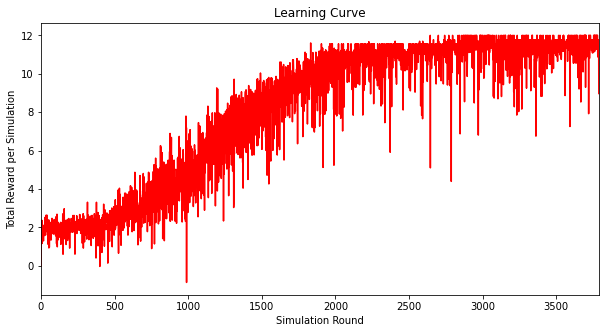

In [14]:
plt.plot(env.total_reward, color="red")
plt.title("Learning Curve")
plt.xlim(0, len(env.total_reward))
plt.ylabel("Total Reward per Simulation")
plt.xlabel("Simulation Round")
plt.rcParams["figure.figsize"] = (10, 5)
plt.show()

### Run simulation

In [7]:
# Reset environment for simulation
state = env.reset()
done = False

# Graph data
inventory_levels = {}
for rw_id in env.simulation.get_regional_warehouses():
    inventory_levels[rw_id] = []
    
cw_inventory_level = []

# Run simulation with model
while not done:
    action, _states = ppo_model.predict(state)
    state, reward, done, info = env.step(action)
    
    # For Graph
    i = 1
    for inv in info["RW Invs:"]:
        inventory_levels[i].append(inv)
        i += 1
    cw_inventory_level.append(info["CW Inv:"])
    
    # print(env.simulation.print_state())
    for i in info:
        print(i, info[i], end=" | ")
    print()
    
print("\n", env.evaluation_parameters())

Steps left: 39 | RW Invs: [9, 8, 9, 7] | Shipments [0, 0, 0, 0] | CW Inv: 13 | Action: [0 0 0 0] | Reward: 0.11 | 
Steps left: 38 | RW Invs: [8, 6, 8, 4] | Shipments [0, 0, 0, 1] | CW Inv: 13 | Action: [0 0 0 1] | Reward: 0.14 | 
Steps left: 37 | RW Invs: [7, 4, 7, 1] | Shipments [0, 0, 0, 1] | CW Inv: 13 | Action: [0 0 0 1] | Reward: 0.24 | 
Steps left: 36 | RW Invs: [6, 2, 6, 8] | Shipments [0, 1, 0, 1] | CW Inv: 13 | Action: [0 1 0 0] | Reward: 0.18 | 
Steps left: 35 | RW Invs: [5, 0, 5, 15] | Shipments [0, 1, 0, 0] | CW Inv: 13 | Action: [0 0 0 0] | Reward: 0.35 | 
Steps left: 34 | RW Invs: [4, 8, 4, 12] | Shipments [0, 0, 0, 0] | CW Inv: 13 | Action: [0 0 0 0] | Reward: 0.15 | 
Steps left: 33 | RW Invs: [3, 6, 3, 9] | Shipments [0, 0, 0, 0] | CW Inv: 13 | Action: [0 0 0 0] | Reward: 0.19 | 
Steps left: 32 | RW Invs: [2, 4, 2, 6] | Shipments [0, 0, 0, 0] | CW Inv: 13 | Action: [0 0 0 0] | Reward: 0.25 | 
Steps left: 31 | RW Invs: [1, 2, 1, 3] | Shipments [1, 1, 1, 1] | CW Inv: 13 |

###### Inventory level graph

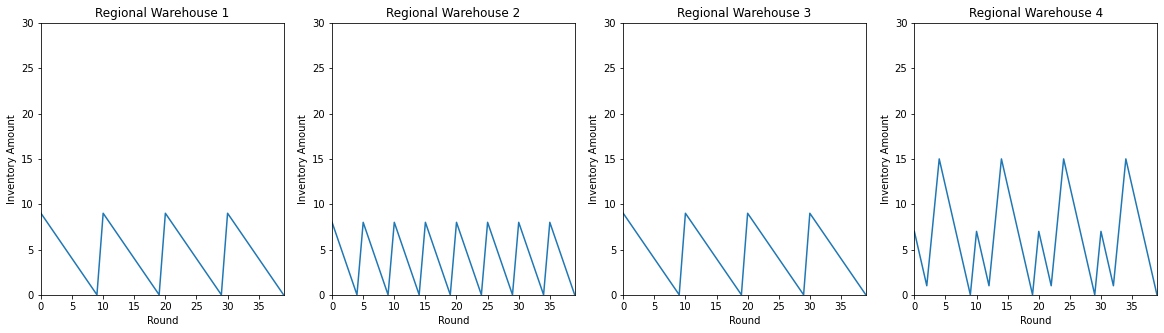

In [10]:
# Plot inventories of regional warehouses
for rw_id in inventory_levels:
    plt.subplot(1, number_of_regional_warehouses, rw_id)
    plt.plot(inventory_levels[rw_id])
    plt.title("Regional Warehouse " + str(rw_id))
    plt.ylim(0, max_inventory_amount_regional_warehouses)
    plt.xlim(0, simulation_length-1)
    plt.ylabel("Inventory Amount")
    plt.xlabel("Round")

plt.rcParams["figure.figsize"] = (20, 5)
plt.show()

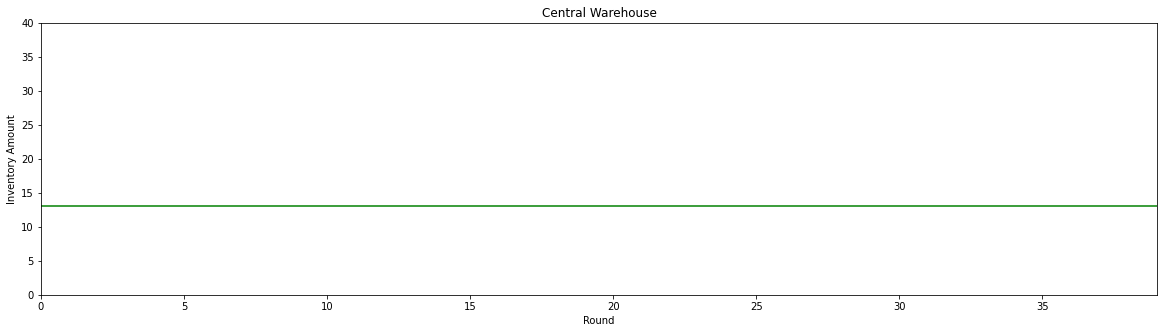

In [11]:
# Plot central warehouse inventory
plt.plot(cw_inventory_level, color="green")
plt.title("Central Warehouse")
plt.ylim(0, max_inventory_amount_central_warehouse)
plt.xlim(0, simulation_length-1)
plt.ylabel("Inventory Amount")
plt.xlabel("Round")
plt.show()